In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Chaos Dungeon Infinite Grind
For this investigation I did 5 replications at each dungeon level for tier 3 chaos dungeons at Star-1 (lowest T3), Sun-1 (max for me at 1375), and Moon-2 (mid-way between minimum and maximum) using my Ignite Sorceress. I collected data at the end of each floor for orbs and shards (infinite grind currencies), red and blue stone drops, and whether or not I got a bonus floor (treasure/boss). For each floor I cleared all packs and bosses (floor 2) before taking the portal.

Given differing clear times for different classes/loadouts and variance in boss spawn times/locations on floor 2 I didn't bother trying to time the runs. Any references to clear time are anecdotal based on my experience.

Since the names of the currencies differ at each tier I have simply called them `orbs` and `shards`. I think its clear which is which.

In [76]:
df = pd.read_csv('histories/cd_ig.csv')
df.head()

,timestamp,character,ilvl,dungeon,at_level,bonus_floor,floor,currency_orbs,currency_shards,red,blue
0,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,1,3,33,0,0
1,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,2,13,74,0,13
2,2022-05-02-18:02:35,Trif,1375,Sun-1,True,False,3,7,53,3,4
3,2022-05-02-18:09:16,Trif,1375,Sun-1,True,False,1,5,39,0,0
4,2022-05-02-18:09:16,Trif,1375,Sun-1,True,False,2,6,90,7,26


During the data collection I only  popped a bonus floor once so I'll ignore this for now. In my experience these are rare enough to not worry about overall. From the one data point I have the bonus floor (I think it was a boss floor) appeared to drop a relatively large number of orbs. Shard drops were within the expected range, but above the mean so potentially higher as well.

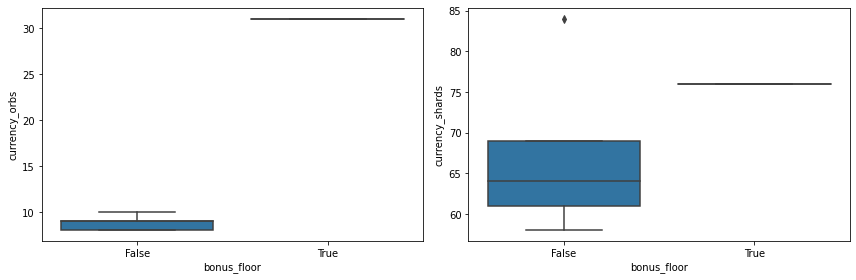

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sb.boxplot(
    data=df.query('dungeon == "Moon-2" & floor == 2'),
    x='bonus_floor',
    y='currency_orbs',
    ax=ax1,
)

sb.boxplot(
    data=df.query('dungeon == "Moon-2" & floor == 2'),
    x='bonus_floor',
    y='currency_shards',
    ax=ax2,
)

fig.tight_layout()

The number of red/blue stones dropped per run is fairly insignificant in comparison to honing costs so I'll ignore those as well.

In [78]:
df = (
    df
    .query('bonus_floor == False')
    .drop(['character', 'ilvl', 'bonus_floor', 'red', 'blue'], axis=1)
)
df.head()

,timestamp,dungeon,at_level,floor,currency_orbs,currency_shards
0,2022-05-02-18:02:35,Sun-1,True,1,3,33
1,2022-05-02-18:02:35,Sun-1,True,2,13,74
2,2022-05-02-18:02:35,Sun-1,True,3,7,53
3,2022-05-02-18:09:16,Sun-1,True,1,5,39
4,2022-05-02-18:09:16,Sun-1,True,2,6,90


## Comparison of At-Level vs Lower-Level Runs

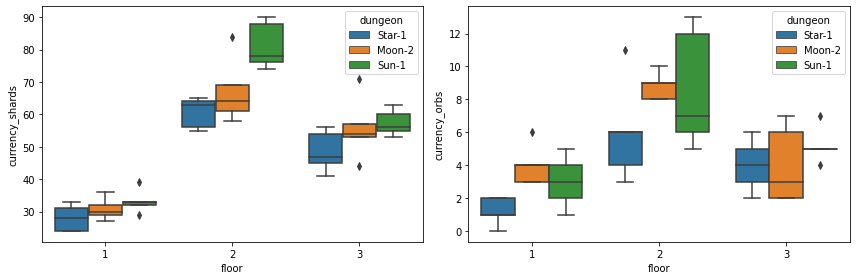

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sb.boxplot(
    data=df,
    x='floor',
    y='currency_shards',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1'),
    ax=ax1,
)

sb.boxplot(
    data=df,
    x='floor',
    y='currency_orbs',
    hue='dungeon',
    hue_order=('Star-1', 'Moon-2', 'Sun-1'),
    ax=ax2,
)

fig.tight_layout()

From the below plot it is clear that for shard drops on floors 1 and 3 the difference is relatively small (although clearly increase with dungeon level) but for floor 2 the mean difference is quite large, with the at-level dungeon giving significantly more reward. However, there is fairly high variance in the drops from floor 2 so I'd like to collect more data here to be sure about this. Differences for orbs are less drastic but still show a similar trend. Again, more data is needed to make a definite determination. I'm not a big fan of p-values so I'll skip a formal difference in means test. The visualization is clear enough.

# 2-Floors vs 3-Floors Strategy

Looking at drops for floors 1-2 vs all 3 for both currencies shows that while floor 2 provides approximately half of the total rewards for the run, the remaining half is not evenly split between floors 1 and 3, with floor 3 dropping nearly twice the rewards of 1. This puts a full third of the rewards on floor 3. 

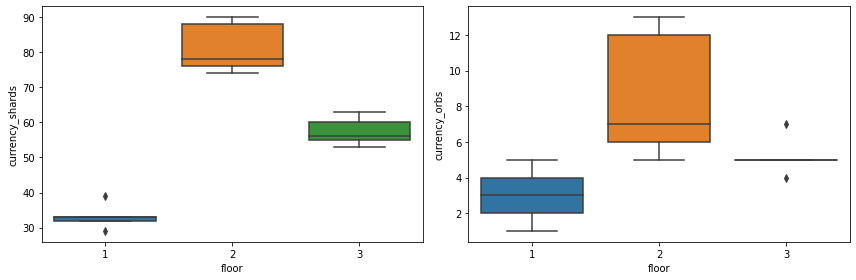

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sb.boxplot(
    data=df.query('at_level == True'),
    x='floor',
    y='currency_shards',
    ax=ax1,
)

sb.boxplot(
    data=df.query('at_level == True'),
    x='floor',
    y='currency_orbs',
    ax=ax2,
)

plt.tight_layout()

In [56]:
floor_means = (
    df
    .query('at_level == True')
    .drop(['at_level'], axis=1)
    .groupby('floor')
    .mean()
)
floor_means

,currency_orbs,currency_shards
floor,,
1,3.0,33.2
2,8.6,81.2
3,5.2,57.4


In [61]:
floor_means / floor_means.sum()

,currency_orbs,currency_shards
floor,,
1,0.178571,0.193248
2,0.511905,0.472643
3,0.309524,0.334109


# Conclusions
While lower-level dungeons are "easier" and therefore take less engagement/time, the difference (for me) isn't enough to make it worth the potential loss of rewards. For support classes this might be a favorable strategy given the lower clear time, but a well-spec'd DPS class the time difference is negligible (mostly spent on final floor 2 boss). Given the high variance (particularly for floor 2), 5 replications isn't really enough to make a definite determination on the exact gain per dungeon level but doing a larger data collection would be fairly tedious.

Additionally, the time investment for floor 3 definitely seems worth it, especially since skipping floor 3 requires a full exit and re-entry where completing floor 3 lets you immediately queue into the next one. Another consideration is that skipping floor 3 you dont get the additional ending bonuses (silver, xp, card xp) which, although small, add up over time given the number of dungeons you'll run doing this.